# This notebook makes the plots that are actually included in the paper
*They will still be neatened up in Inkscape or Illustrator, but that is meant to be fairly minimal*

In [1]:
# load in the necessary packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import pandas as pd
import numpy as np
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

### Load all the data
This is taken from the scatterplots.ipynb notebook, where there are some print outs of the data itself

In [2]:
# Load all the data
all_runs = pd.read_csv("summary_data/tidy_numbers.csv")
# Jump through some hopes to reomve suspect data...
numerical=all_runs.iloc[:,2:]
numerical.mask(abs(numerical) > 1e8, np.nan,inplace=True)
#numerical.mask(abs(numerical) < 1e-6, np.nan,inplace=True)
all_runs.iloc[:,2:]=numerical
obs=all_runs.loc[all_runs['model'] == 'C20-Reanalysis']
obs['DMI stddev'].values

array([0.462645])

In [3]:
lgm=all_runs.loc[all_runs['experiment'] == 'lgm-cal-adj']
lgm.set_index('model', inplace = True)
all_pis=all_runs.loc[all_runs['experiment'] == 'piControl']
all_pis.set_index('model', inplace = True)
lgm_pis=all_pis[all_pis.index.isin(lgm.index)]
# drop the experiment and years columns
lgm_pis.drop(['experiment','years'],axis=1, inplace=True)
lgm.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
lgm_diff=lgm-lgm_pis
lgm_diff['experiment']='lgm'
lgm_diff['run']=list(range(0,np.size(lgm.index)))
lgm_diff.reset_index(inplace=True)
lgm_diff.set_index('run',inplace=True)
lgm['experiment']='lgm'
lgm['ensemble']='lgm'
lgm['run']='expt'
lgm_pis['experiment']='piControl'
lgm_pis['ensemble']='lgm'
lgm_pis['run']='ctl'

In [4]:
lig127k=all_runs.loc[all_runs['experiment'] == 'lig127k-cal-adj']
lig127k.set_index('model', inplace = True)
lig127k_pis=all_pis[all_pis.index.isin(lig127k.index)]
# drop the experiment and years columns
lig127k_pis.drop(columns=['experiment','years'],inplace=True)
lig127k.drop(columns=['experiment','years'],inplace=True)
# Create a difference grid
lig127k_diff=lig127k-lig127k_pis
lig127k_diff['experiment']='lig127k'
lig127k_diff['run']=list(range(50,50+np.size(lig127k.index)))
lig127k_diff.reset_index(inplace=True)
lig127k_diff.set_index('run',inplace=True)
lig127k['experiment']='lig127k'
lig127k['ensemble']='lig127k'
lig127k['run']='expt'
lig127k_pis=all_pis[all_pis.index.isin(lig127k.index)]
lig127k_pis['experiment']='piControl'
lig127k_pis['ensemble']='lig127k'
lig127k_pis['run']='ctl'


In [5]:
midHolocene=all_runs.loc[all_runs['experiment'] == 'midHolocene-cal-adj']
midHolocene.set_index('model', inplace = True)
midHolocene_pis=all_pis[all_pis.index.isin(midHolocene.index)]
midHolocene_pis.drop(['experiment','years'],axis=1, inplace=True)
midHolocene.drop(['experiment','years'],axis=1, inplace=True)
midHolocene_diff=midHolocene-midHolocene_pis
midHolocene_diff['experiment']='midHolocene'
midHolocene_diff['run']=list(range(100,100+np.size(midHolocene.index)))
midHolocene_diff.reset_index(inplace=True)
midHolocene_diff.set_index('run',inplace=True)
midHolocene['experiment']='midHolocene'
midHolocene['ensemble']='midHolocene'
midHolocene['run']='expt'
midHolocene_pis['experiment']='piControl'
midHolocene_pis['ensemble']='midHolocene'
midHolocene_pis['run']='ctl'

In [6]:
abrupt4xCO2=all_runs.loc[all_runs['experiment'] == 'abrupt4xCO2']
abrupt4xCO2.set_index('model', inplace = True)
abrupt4xCO2_pis=all_pis[all_pis.index.isin(abrupt4xCO2.index)]
# drop the experiment and years columns
abrupt4xCO2_pis.drop(['experiment','years'],axis=1, inplace=True)
abrupt4xCO2.drop(['experiment','years'],axis=1, inplace=True)
# Create a difference grid
abrupt4xCO2_diff=abrupt4xCO2-abrupt4xCO2_pis
# add back in the experiment name
abrupt4xCO2_diff['experiment']='abrupt4xCO2'
abrupt4xCO2_diff['run']=list(range(150,150+np.size(abrupt4xCO2.index)))
abrupt4xCO2_diff.reset_index(inplace=True)
abrupt4xCO2_diff.set_index('run',inplace=True)
abrupt4xCO2['experiment']='abrupt4xCO2'
abrupt4xCO2['ensemble']='abrupt4xCO2'
abrupt4xCO2['run']='expt'
abrupt4xCO2_pis['experiment']='piControl'
abrupt4xCO2_pis['ensemble']='abrupt4xCO2'
abrupt4xCO2_pis['run']='ctl'

In [7]:
# Combine together to enable plotting
all_ensembles=pd.concat([lgm,lgm_pis,midHolocene,midHolocene_pis,lig127k,lig127k_pis,abrupt4xCO2,abrupt4xCO2_pis],ignore_index=True)
all_diffs=pd.concat([lgm_diff,midHolocene_diff,lig127k_diff,abrupt4xCO2_diff])
not_abrup4xCO2_diffs=pd.concat([lgm_diff,midHolocene_diff,lig127k_diff])
orb_diffs=pd.concat([midHolocene_diff,lig127k_diff])

In [8]:
# Add some colors to allow for convenient plotting...
all_diffs['color'] = all_diffs['experiment']
all_diffs['color'] = all_diffs['color'].map({'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'},
                             na_action=None)
                             
palette={"piControl": "black", 'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'}

## Figure 4: IOD & IOBM amplitude

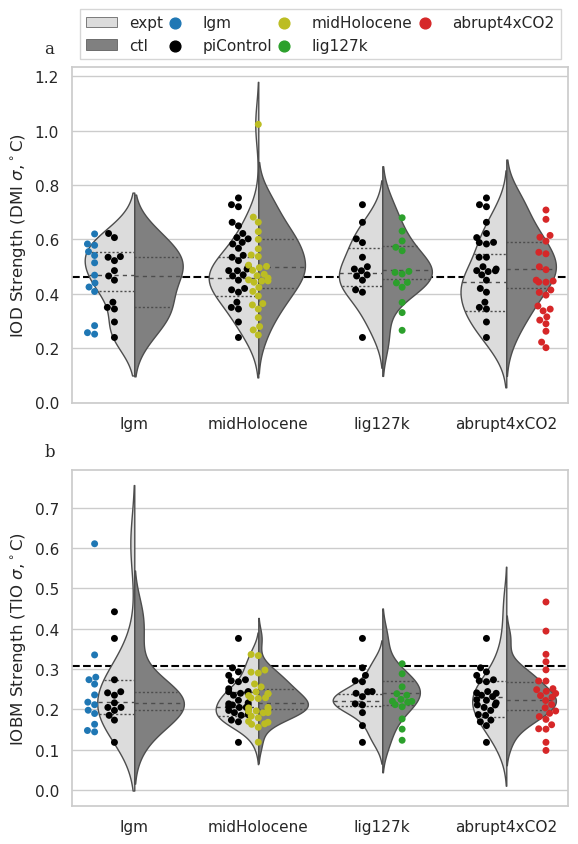

In [9]:
fig4=plt.figure(figsize=(6.4, 9.6))
ax1=fig4.add_subplot(211)
ax1.axhline(obs['DMI stddev'].values,color='black',ls='--',zorder=-1)
ax1=sns.violinplot(data=all_ensembles, x="ensemble", y="DMI stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax1=sns.swarmplot(x="ensemble", y="DMI stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig4.dpi_scale_trans)
ax1.text(0.0, 1.0,"a", transform=ax1.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax1.set_ylabel('IOD Strength (DMI $\sigma$,$^\circ$C)')
ax1.set_xlabel('')

ax2=fig4.add_subplot(212)
ax2.axhline(obs['IOBM'].values,color='black',ls='--',zorder=-1)
ax2=sns.violinplot(data=all_ensembles, x="ensemble", y="IOBM", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax2=sns.swarmplot(x="ensemble", y="IOBM", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
ax2.text(0.0, 1.0,"b", transform=ax2.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax2.set_ylabel('IOBM Strength (TIO $\sigma$,$^\circ$C)')
ax1.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",
          ncol=4, fancybox=False, shadow=False)
ax2.get_legend().remove()
ax2.set_xlabel('')
fig4.savefig('plots-pretty/violins.png')
fig4.savefig('plots-pretty/violins.pdf')

In [10]:
# Add some colors to allow for convenient plotting...
all_diffs['color'] = all_diffs['experiment']
all_diffs['color'] = all_diffs['color'].map({'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'},
                             na_action=None)

In [11]:
# Add some colors to allow for convenient plotting...
all_diffs['color'] = all_diffs['experiment']
all_diffs['color'] = all_diffs['color'].map({'lgm':'tab:blue',
                             'midHolocene':'tab:olive',
                             'lig127k':'tab:green',
                             'abrupt4xCO2':'tab:red'},
                             na_action=None)

## Figure 6: Relationships with the mean state

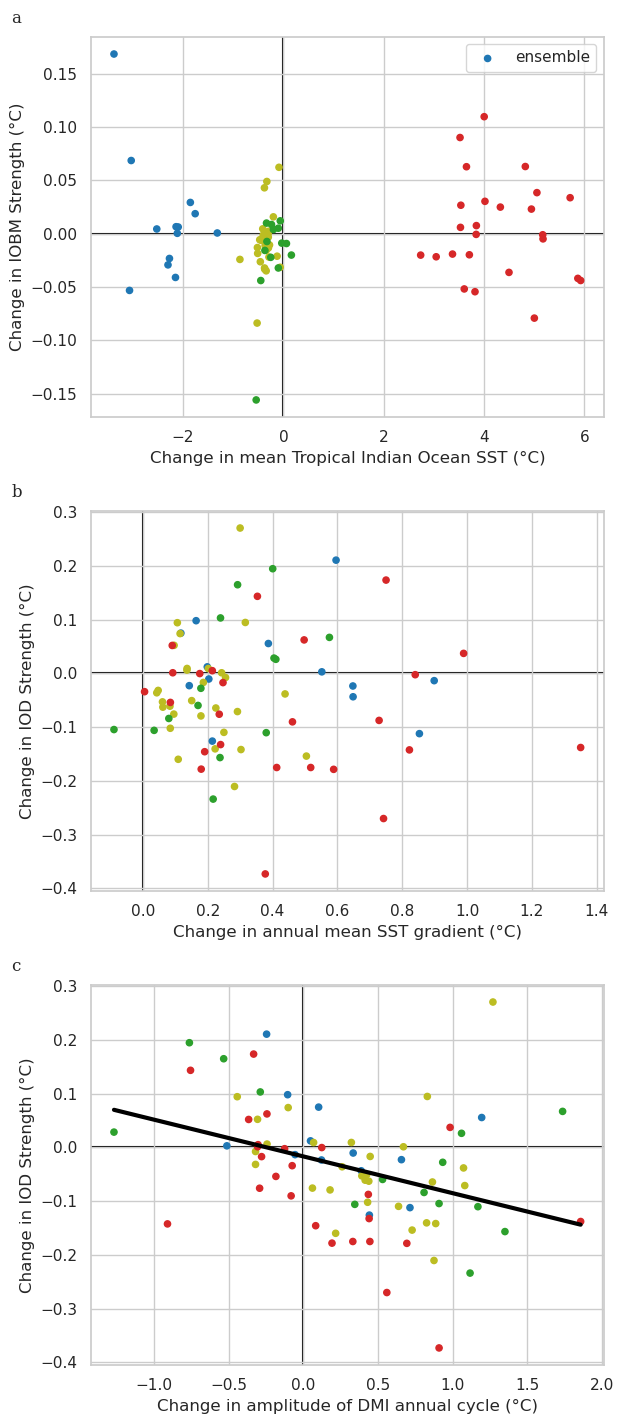

In [13]:
fig6=plt.figure(figsize=(6.4, 14.4))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig6.dpi_scale_trans)

ax1=fig6.add_subplot(311)
all_diffs.plot.scatter(x='TIO mean',y='IOBM',c='color',label='ensemble',ax=ax1)
ax1.axhline(0,color='black',zorder=-1)
ax1.axvline(0,color='black',zorder=-1)
ax1.text(-0.1, 1.0,"a", transform=ax1.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax1.set_ylabel(u'Change in IOBM Strength (\u00B0C)')
ax1.set_xlabel(u'Change in mean Tropical Indian Ocean SST (\u00B0C)')

ax2=fig6.add_subplot(312)
all_diffs.plot.scatter(x='DMI mean',y='DMI stddev',c='color',ax=ax2)
ax2.axhline(0,color='black',zorder=-1)
ax2.axvline(0,color='black',zorder=-1)
ax2.text(-0.1, 1.0,"b", transform=ax2.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax2.set_ylabel(u'Change in IOD Strength (\u00B0C)')
ax2.set_xlabel(u'Change in annual mean SST gradient (\u00B0C)')



ax3=fig6.add_subplot(313)
all_diffs.plot.scatter(x='DMI AnnCycAmp',y='DMI stddev',c='color',ax=ax3)
ax3.axhline(0,color='black',zorder=-1)
ax3.axvline(0,color='black',zorder=-1)
ax3.text(-0.1, 1.0,"c", transform=ax3.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax3.set_ylabel(u'Change in IOD Strength (\u00B0C)')
ax3.set_xlabel(u'Change in amplitude of DMI annual cycle (\u00B0C)')
z = np.polyfit(all_diffs['DMI AnnCycAmp'],all_diffs['DMI stddev'], 1)
p = np.poly1d(z)
straight=np.array([min(all_diffs['DMI AnnCycAmp']),max(all_diffs['DMI AnnCycAmp'])])
plt.plot(straight,p(straight),color='black',linewidth=3)

fig6.tight_layout() 
plt.show()
fig6.savefig('plots-pretty/mean-state.png')
fig6.savefig('plots-pretty/mean-state.pdf')

## Figure 7: ENSO

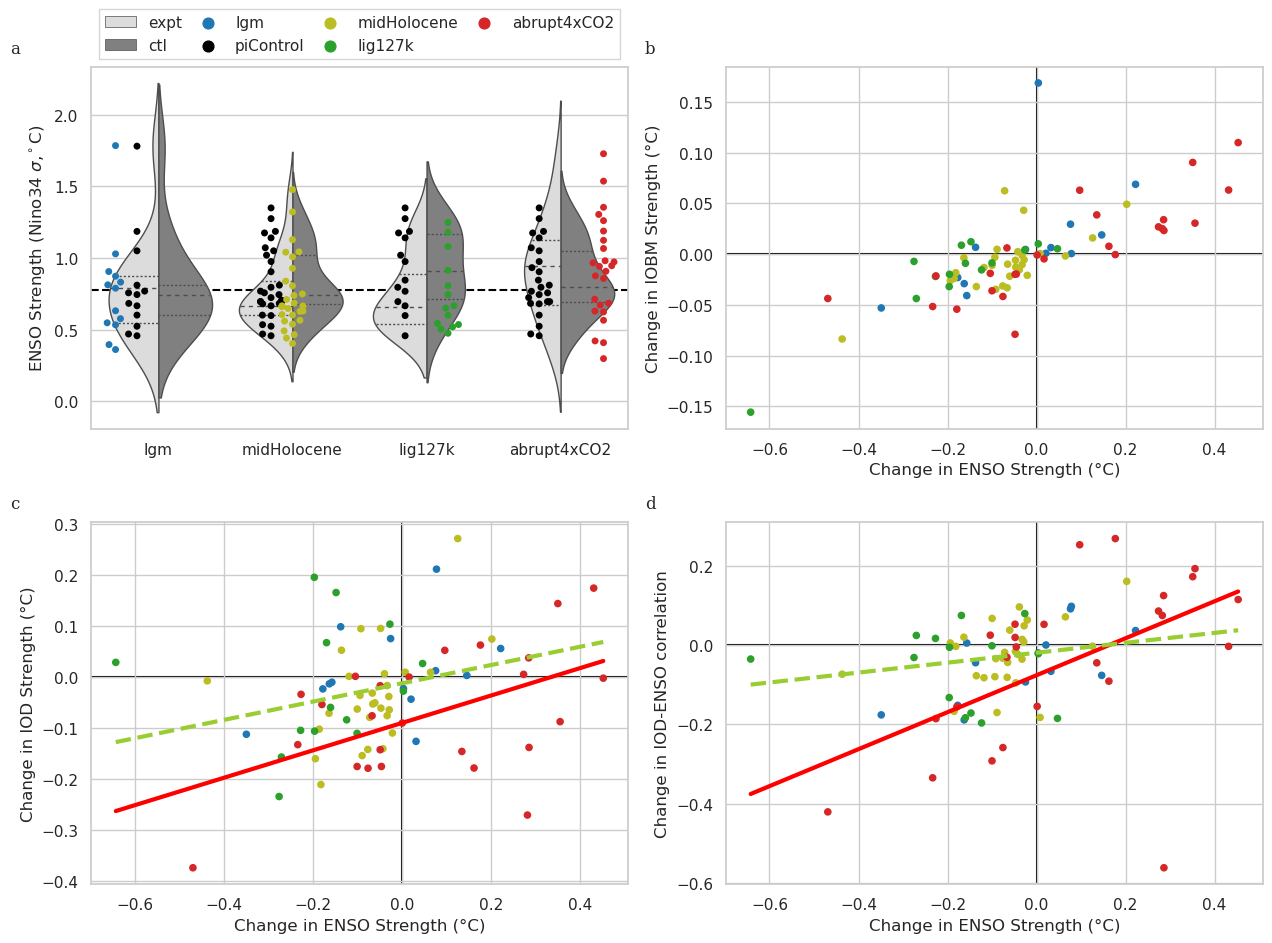

In [14]:
fig7=plt.figure(figsize=(12.8, 9.6))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig7.dpi_scale_trans)
ax1=fig7.add_subplot(221)
ax1.axhline(obs['Nino34 stddev'].values,color='black',ls='--',zorder=-1)
ax1=sns.violinplot(data=all_ensembles, x="ensemble", y="Nino34 stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax1=sns.swarmplot(x="ensemble", y="Nino34 stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig4.dpi_scale_trans)
ax1.text(-0.1, 1.0,"a", transform=ax1.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax1.set_ylabel('ENSO Strength (Nino34 $\sigma$,$^\circ$C)')
ax1.set_xlabel('')
ax1.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",
          ncol=4, fancybox=False, shadow=False)

ax2=fig7.add_subplot(222)
all_diffs.plot.scatter(x='Nino34 stddev',y='IOBM',c='color',ax=ax2)
ax2.axhline(0,color='black',zorder=-1)
ax2.axvline(0,color='black',zorder=-1)
ax2.text(-0.1, 1.0,"b", transform=ax2.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax2.set_ylabel(u'Change in IOBM Strength (\u00B0C)')
ax2.set_xlabel(u'Change in ENSO Strength (\u00B0C)')

ax3=fig7.add_subplot(223)
all_diffs.plot.scatter(x='Nino34 stddev',y='DMI stddev',c='color',ax=ax3)
ax3.axhline(0,color='black',zorder=-1)
ax3.axvline(0,color='black',zorder=-1)
ax3.text(-0.1, 1.0,"c", transform=ax3.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax3.set_ylabel(u'Change in IOD Strength (\u00B0C)')
ax3.set_xlabel(u'Change in ENSO Strength (\u00B0C)')
z = np.polyfit(abrupt4xCO2_diff['Nino34 stddev'],abrupt4xCO2_diff['DMI stddev'], 1)
p = np.poly1d(z)
straight=[min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])]
plt.plot(straight,p(straight),color='red', linewidth=3)
z = np.polyfit(orb_diffs['Nino34 stddev'],orb_diffs['DMI stddev'], 1)
p = np.poly1d(z)
plt.plot(straight,p(straight),color='yellowgreen', linewidth=3, linestyle="--")

#r(nino34.iod)
ax4=fig7.add_subplot(224)
all_diffs.plot.scatter(x='Nino34 stddev',y='r(nino34.iod)',c='color',ax=ax4)
ax4.axhline(0,color='black',zorder=-1)
ax4.axvline(0,color='black',zorder=-1)
ax4.text(-0.1, 1.0,"d", transform=ax4.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax4.set_ylabel(u'Change in IOD-ENSO correlation')
ax4.set_xlabel(u'Change in ENSO Strength (\u00B0C)')
z = np.polyfit(abrupt4xCO2_diff['Nino34 stddev'],abrupt4xCO2_diff['r(nino34.iod)'], 1)
p = np.poly1d(z)
straight=[min(all_diffs['Nino34 stddev']),max(all_diffs['Nino34 stddev'])]
plt.plot(straight,p(straight),color='red', linewidth=3)
z = np.polyfit(orb_diffs['Nino34 stddev'],orb_diffs['r(nino34.iod)'], 1)
p = np.poly1d(z)
plt.plot(straight,p(straight),color='yellowgreen', linewidth=3, linestyle="--")

fig7.tight_layout() 
plt.show()
fig7.savefig('plots-pretty/enso.png')
fig7.savefig('plots-pretty/enso.pdf')



## Figure 8: Nino-like mode 

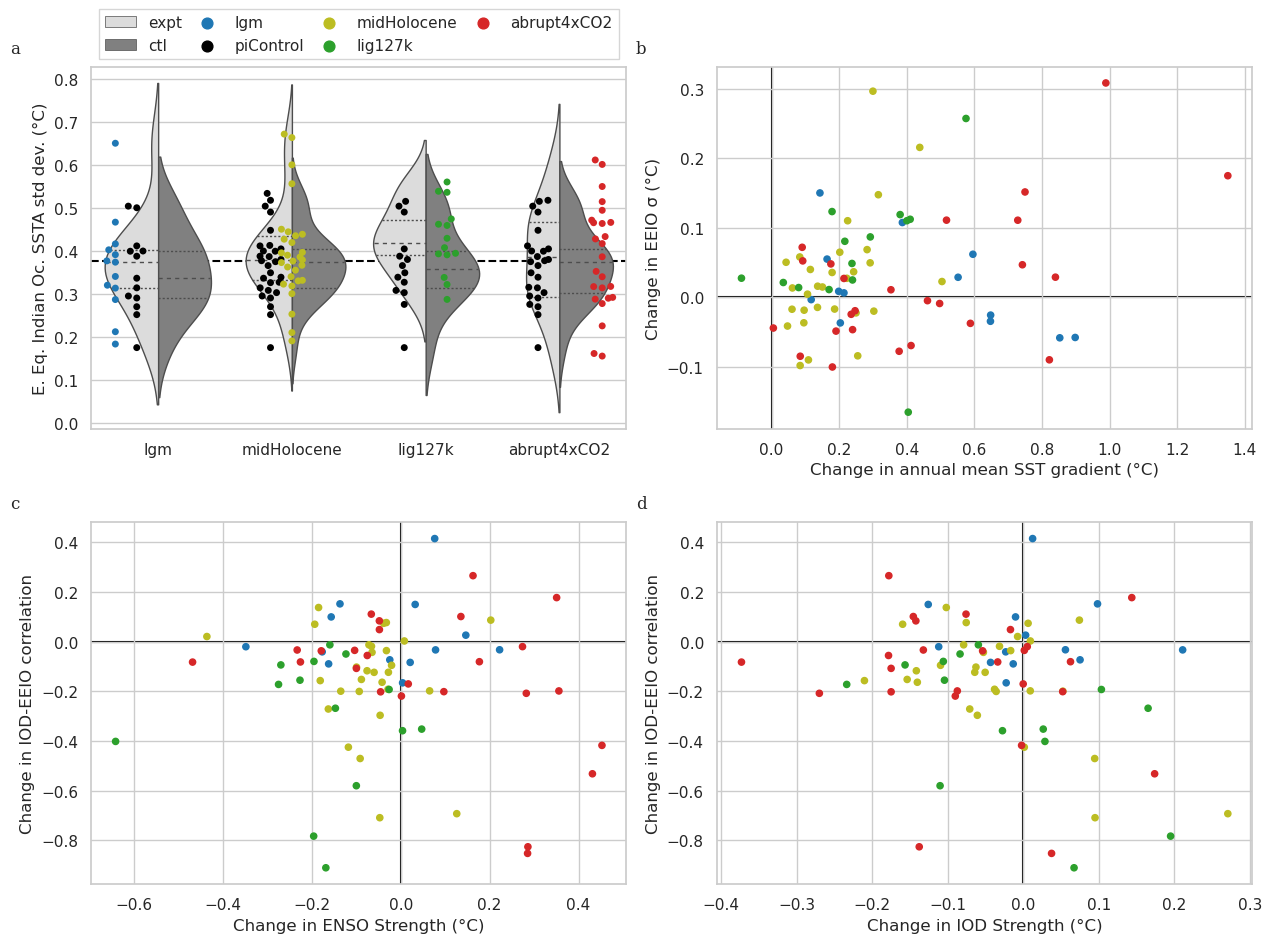

In [15]:
fig8=plt.figure(figsize=(12.8, 9.6))
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig8.dpi_scale_trans)
ax1=fig8.add_subplot(221)
ax1.axhline(obs['EEIO stddev'].values,color='black',ls='--',zorder=-1)
ax1=sns.violinplot(data=all_ensembles, x="ensemble", y="EEIO stddev", hue="run",
               split=True, inner="quart", linewidth=1,palette={'ctl':'gray','expt':'gainsboro'})
ax1=sns.swarmplot(x="ensemble", y="EEIO stddev", hue="experiment",
                   data=all_ensembles,palette=palette,dodge=True)
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig4.dpi_scale_trans)
ax1.text(-0.1, 1.0,"a", transform=ax1.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax1.set_ylabel(u'E. Eq. Indian Oc. SSTA std dev. (\u00B0C)')
ax1.set_xlabel('')
ax1.legend(bbox_to_anchor=(0, 1, 1, 0), loc="lower left", mode="expand",
          ncol=4, fancybox=False, shadow=False)

ax2=fig8.add_subplot(222)
all_diffs.plot.scatter(x='DMI mean',y='EEIO stddev',c='color',ax=ax2)
ax2.axhline(0,color='black',zorder=-1)
ax2.axvline(0,color='black',zorder=-1)
ax2.text(-0.1, 1.0,"b", transform=ax2.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax2.set_ylabel(u'Change in EEIO \u03C3 (\u00B0C)')
ax2.set_xlabel(u'Change in annual mean SST gradient (\u00B0C)')

ax3=fig8.add_subplot(223)
all_diffs.plot.scatter(x='Nino34 stddev',y='r(iod.eeio)',c='color',ax=ax3)
ax3.axhline(0,color='black',zorder=-1)
ax3.axvline(0,color='black',zorder=-1)
ax3.text(-0.1, 1.0,"c", transform=ax3.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax3.set_ylabel('Change in IOD-EEIO correlation')
ax3.set_xlabel(u'Change in ENSO Strength (\u00B0C)')

#r(nino34.iod)
ax4=fig8.add_subplot(224)
all_diffs.plot.scatter(x='DMI stddev',y='r(iod.eeio)',c='color',ax=ax4)
ax4.axhline(0,color='black',zorder=-1)
ax4.axvline(0,color='black',zorder=-1)
ax4.text(-0.1, 1.0,"d", transform=ax4.transAxes + trans,
            fontsize='medium', va='bottom', fontfamily='serif')
ax4.set_ylabel(u'Change in IOD-EEIO correlation')
ax4.set_xlabel(u'Change in IOD Strength (\u00B0C)')

fig8.tight_layout() 
plt.show()
fig8.savefig('plots-pretty/nino-like.png')
fig8.savefig('plots-pretty/nino-like.pdf')